# PHYS 381 ASSIGNMENT 2

### Simulating a damped nonlinear pendulum with runge-kutta method

## Imports

In [9]:
import matplotlib.pylab as plt
# used to express figure axes as multiples of some constant (pi in this case)
import matplotlib.ticker as ticker
import numpy as np
import math

## Global Variables

In [10]:
# acceleration due to gravity
g = 1
# pendelum length
L = 1
# angular frequency
phi = 2.0 / 3.0
# amplitude
A = 0.0
# damping coefficient
k = 0.5
        

## Defining f

In [11]:
def f_nonlin(theta, omega, t):
    return  -(g / L) * math.sin(theta) - k * omega + A * math.cos(phi * t)

### Set up a function to simplify multiple simulations

In [12]:
def simulate_and_plot(theta_init, omega_init, save=False, show=True, filename='untitled'):
    
    #init values
    theta = theta_init
    omega = omega_init
    t = 0.0
    dt = 0.01

    # stores our output (time, theta, omega)
    data_log = []

    # iterate 1000 times
    for i in range(1000):
        #Using runge-kutta
        k1a = dt * omega
        k1b = dt * f_nonlin(theta, omega, t)
        k2a = dt * (omega + k1b/2)
        k2b = dt * f_nonlin(theta + k1a/2, omega + k1b/2, t + dt/2)
        k3a = dt * (omega + k2b/2)
        k3b = dt * f_nonlin(theta + k2a/2, omega + k2b/2, t + dt/2)
        k4a = dt * (omega + k3b)
        k4b = dt * f_nonlin(theta + k3a, omega + k3b, t + dt)
        theta = theta + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
        omega = omega + (k1b + 2 * k2b + 2 * k3b + k4b) / 6
        t = t + dt
        
        data_log.append( (t, theta, omega) )

    # retrieve values from data_log
    t_values     = [elem[0] for elem in data_log]
    theta_values = [elem[1] / math.pi for elem in data_log]
    omega_values = [elem[2] / math.pi for elem in data_log]

    # setting up the figure 
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(1, 1, 1)
    
    # placing axes
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(t_values, theta_values, 'r', label=r'$\theta$ (radians)')
    plt.plot(t_values, omega_values, 'b', label=r'$\omega (\frac{radians}{s})$')
    
    # express yaxis as multiples of pi
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

    # should go from -pi to pi
    plt.ylim([-1, 1])

    # title graph
    plt.title(  f'Non-Linear Solution for Damped Pendelum'
                 '\n'
                r'$\theta_0 = $' + f'{theta_init} | ' + r'$\omega_0 = $' + f'{omega_init}')

    # label x as time
    plt.xlabel("t (s)")

    # show legend, and show plot
    plt.legend(loc='upper right')
    
    if save: plt.savefig(f'./SavedPlots/{filename}')
    if show: plt.show()

## Using the method

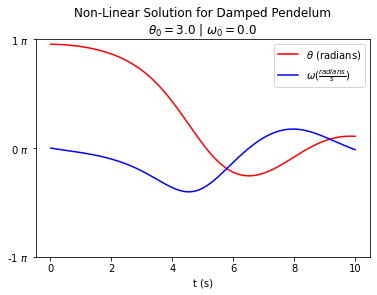

In [13]:
theta_init = 3.0
omega_init = 0.0

simulate_and_plot(theta_init,omega_init,True,True,'Exercise_8_Part_b')
